In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('employees.csv')

In [3]:
df.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services


In [4]:
df.describe()

,Salary,Bonus %
count,1000.000000,1000.000000
mean,90662.181000,10.207555
std,32923.693342,5.528481
min,35013.000000,1.015000
25%,62613.000000,5.401750
50%,90428.000000,9.838500
75%,118740.250000,14.838000
max,149908.000000,19.944000


In [5]:
df.describe(include='O')

,First Name,Gender,Start Date,Last Login Time,Senior Management,Team
count,933,855,1000,1000,933,957
unique,200,2,972,720,2,10
top,Marilyn,Female,10/30/1994,1:35 PM,True,Client Services
freq,11,431,2,5,468,106


In [6]:
df.isna().sum()

First Name            67
Gender               145
Start Date             0
Last Login Time        0
Salary                 0
Bonus %                0
Senior Management     67
Team                  43
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   First Name         933 non-null    object 
 1   Gender             855 non-null    object 
 2   Start Date         1000 non-null   object 
 3   Last Login Time    1000 non-null   object 
 4   Salary             1000 non-null   int64  
 5   Bonus %            1000 non-null   float64
 6   Senior Management  933 non-null    object 
 7   Team               957 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


In [8]:
df['Gender'].value_counts()

Female    431
Male      424
Name: Gender, dtype: int64

In [9]:
df.groupby('Gender')[['Salary']].mean()

,Salary
Gender,
Female,90023.923434
Male,91180.669811


<AxesSubplot:>

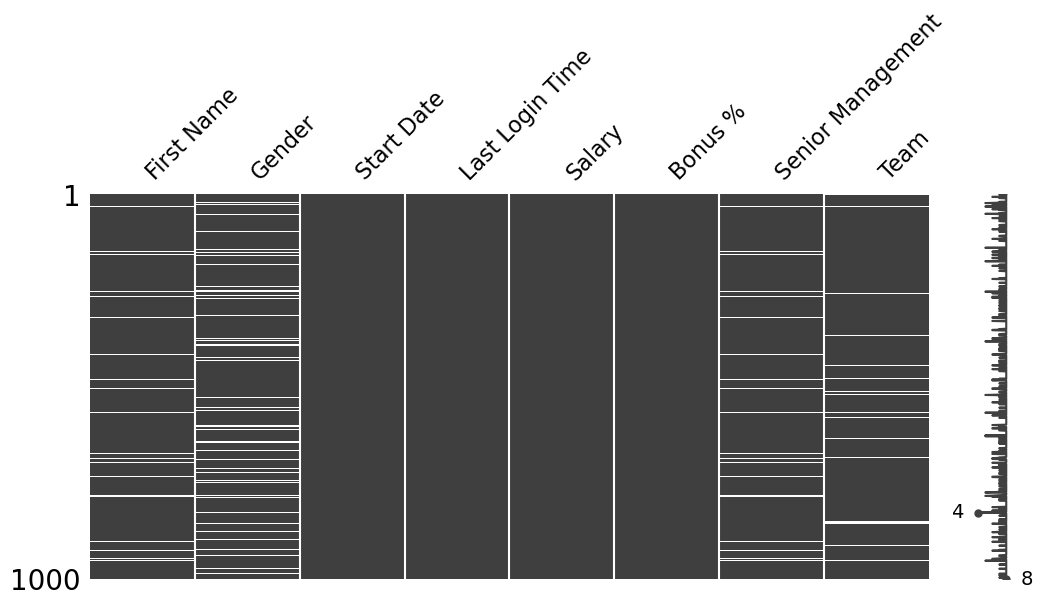

In [10]:
import missingno as msno

msno.matrix(df, figsize=(12, 5))

In [11]:
df['First Name'].unique()

array(['Douglas', 'Thomas', 'Maria', 'Jerry', 'Larry', 'Dennis', 'Ruby',
       nan, 'Angela', 'Frances', 'Louise', 'Julie', 'Brandon', 'Gary',
       'Kimberly', 'Lillian', 'Jeremy', 'Shawn', 'Diana', 'Donna', 'Lois',
       'Matthew', 'Joshua', 'John', 'Craig', 'Scott', 'Terry', 'Benjamin',
       'Christina', 'Joyce', 'Jean', 'Theresa', 'Rachel', 'Linda',
       'Stephanie', 'Michael', 'Christine', 'Beverly', 'Marilyn',
       'Cynthia', 'Roger', 'Bruce', 'Kathy', 'Clarence', 'Chris', 'Nancy',
       'Todd', 'Alan', 'Sara', 'Karen', 'Carl', 'Henry', 'Irene', 'Paula',
       'Denise', 'Kathleen', 'Steve', 'Jose', 'Johnny', 'Bobby', 'Bonnie',
       'Margaret', 'Charles', 'Robin', 'Gerald', 'Christopher', 'Steven',
       'Doris', 'Annie', 'Janice', 'James', 'Virginia', 'Harry',
       'Heather', 'Laura', 'Tina', 'Harold', 'Melissa', 'Aaron', 'Jack',
       'Phyllis', 'Paul', 'Russell', 'Shirley', 'Willie', 'Ashley',
       'Pamela', 'Andrea', 'Peter', 'Helen', 'Patricia', 'Michelle',

In [12]:
df[(df['Gender'].isna()) & df['First Name'].isna()]

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
51,NaN,NaN,12/17/2011,8:29 AM,41126,14.009,NaN,Sales
174,NaN,NaN,9/18/2007,6:59 PM,40297,6.185,NaN,Client Services
253,NaN,NaN,4/28/2003,3:01 AM,113732,10.391,NaN,Sales
521,NaN,NaN,9/25/1981,9:59 AM,83895,17.971,NaN,Engineering
628,NaN,NaN,9/2/1988,12:49 PM,147309,1.702,NaN,Distribution
783,NaN,NaN,4/15/1991,3:39 AM,132505,13.592,NaN,Product
826,NaN,NaN,8/1/1988,1:35 AM,87103,5.665,NaN,NaN


([<matplotlib.patches.Wedge at 0x7fe650735670>,
 [Text(-0.014146032566167392, 1.0999090370401714, 'Female'),
  Text(0.014146135547083343, -1.0999090357157193, 'Male')],
 [Text(-0.007716017763364031, 0.5999503838400935, '50.4%'),
  Text(0.007716073934772732, -0.599950383117665, '49.6%')])

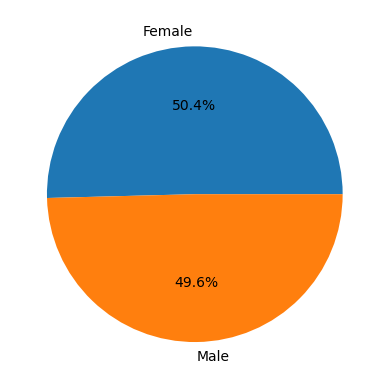

In [13]:
fig, ax = plt.subplots()
ax.pie(x=df['Gender'].value_counts(), labels=['Female', 'Male'], autopct='%1.1f%%')

<AxesSubplot:xlabel='Gender', ylabel='Bonus %'>

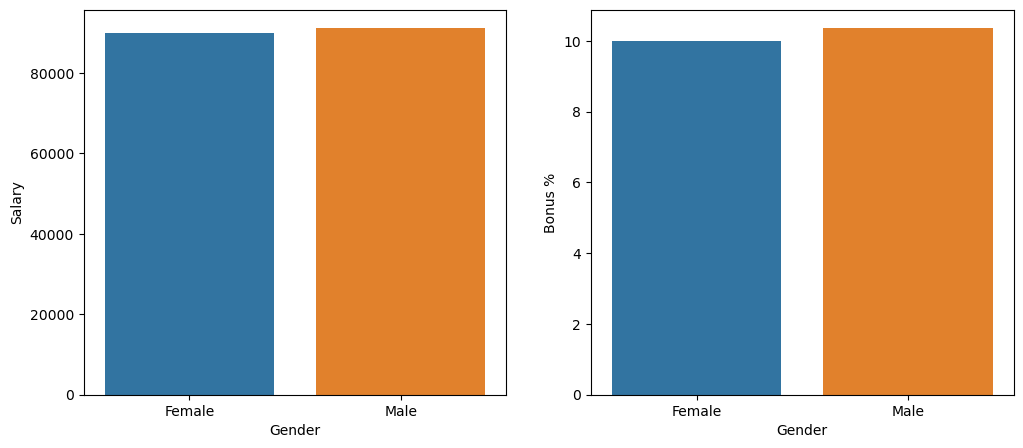

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(x='Gender', y='Salary', data=df.groupby('Gender')['Salary'].mean().reset_index(), ax=axes[0])
sns.barplot(x='Gender', y='Bonus %', data=df.groupby('Gender')['Bonus %'].mean().reset_index(), ax=axes[1])

<AxesSubplot:xlabel='Bonus %', ylabel='Density'>

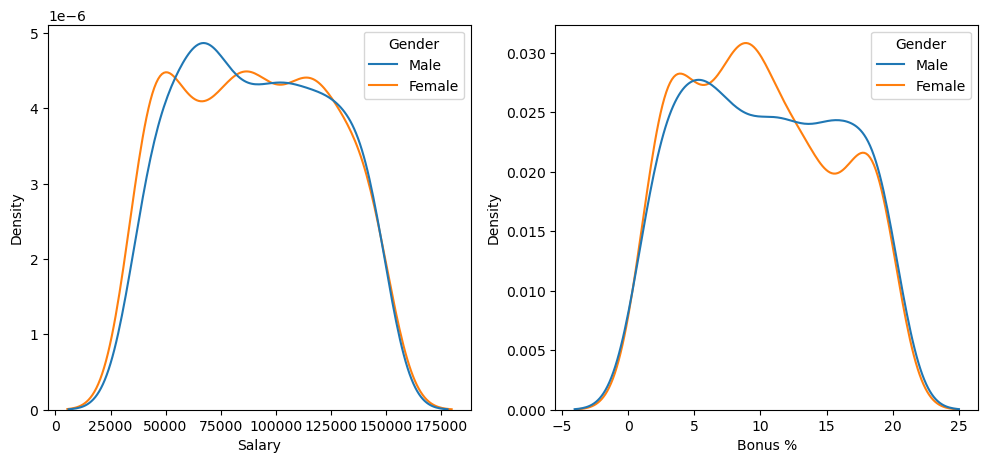

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.kdeplot(x=df['Salary'], hue=df['Gender'], ax=axes[0])
sns.kdeplot(x=df['Bonus %'], hue=df['Gender'], ax=axes[1])

<AxesSubplot:xlabel='Team', ylabel='count'>

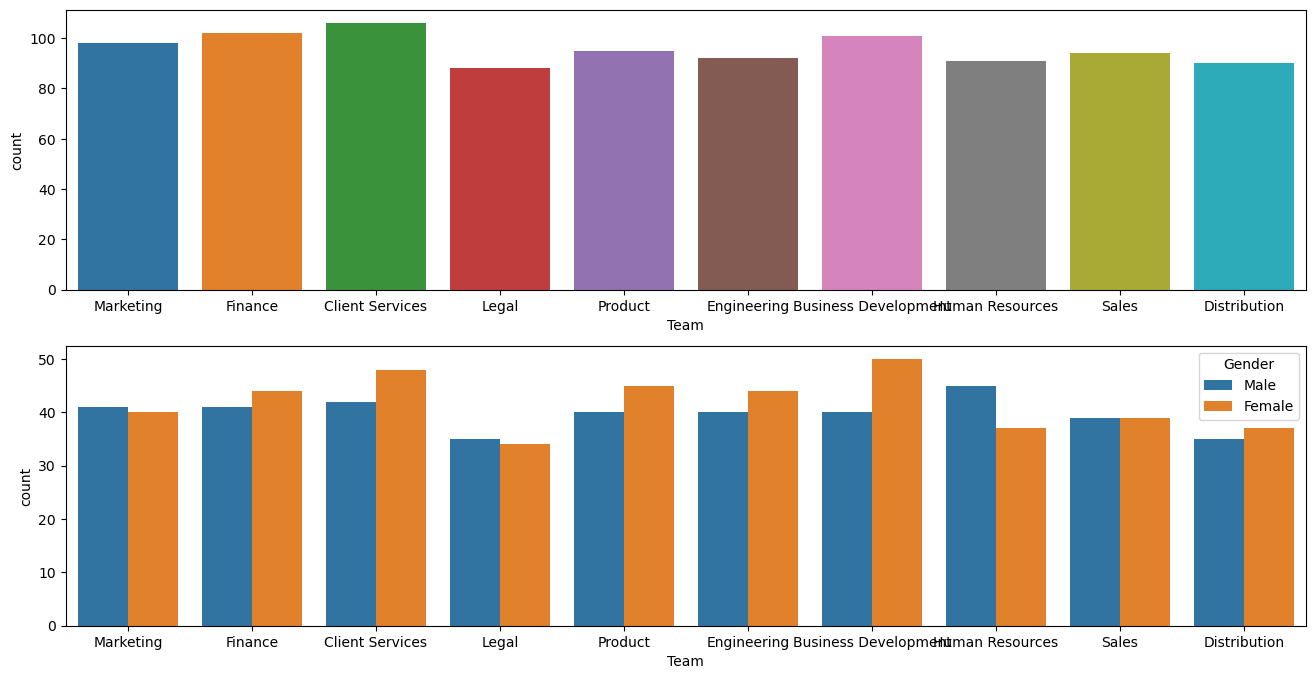

In [16]:
fig, axes = plt.subplots(2, 1, figsize=(16, 8))

sns.countplot(x='Team', data=df, ax=axes[0])
sns.countplot(x='Team', hue='Gender', data=df, ax=axes[1])

In [17]:
df.groupby('Team')['Salary'].mean().sort_values(ascending=False)

Team
Engineering             94269.195652
Finance                 92219.480392
Sales                   92173.436170
Business Development    91866.316832
Human Resources         90944.527473
Marketing               90435.591837
Legal                   89303.613636
Product                 88665.505263
Distribution            88500.466667
Client Services         88224.424528
Name: Salary, dtype: float64

In [18]:
df.groupby(['Team', 'Gender'])[['Salary']].mean()

Salary
Team                 Gender              
Business Development Female  92669.060000
                     Male    89071.750000
Client Services      Female  86430.083333
                     Male    93141.833333
Distribution         Female  81328.162162
                     Male    93861.800000
Engineering          Female  90311.045455
                     Male    98408.250000
Finance              Female  92203.454545
                     Male    95507.731707
Human Resources      Female  93581.837838
                     Male    91368.733333
Legal                Female  90790.382353
                     Male    84254.657143
Marketing            Female  95074.250000
                     Male    86082.365854
Product              Female  86182.644444
                     Male    88957.825000
Sales                Female  89814.564103
                     Male    93196.666667

<AxesSubplot:xlabel='Team', ylabel='Salary'>

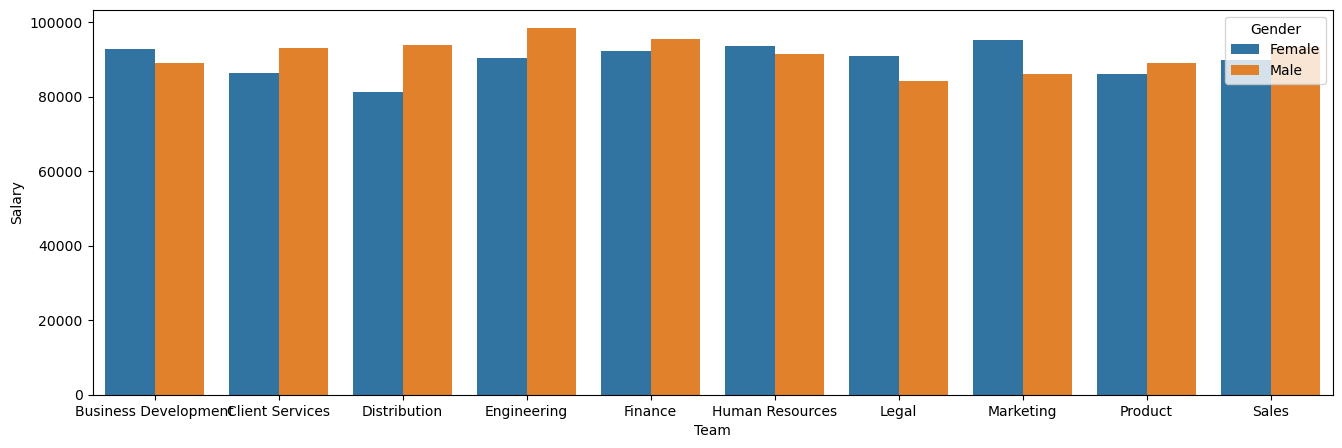

In [19]:
plt.figure(figsize=(16, 5))
sns.barplot(x='Team', y='Salary', hue='Gender', data=df.groupby(['Team', 'Gender'])[['Salary']].mean().reset_index())

In [20]:
df[df['Team']=='Engineering'].groupby('Gender')[['Salary']].count()

,Salary
Gender,
Female,44
Male,40


In [21]:
gender_na = df[df['Gender'].isna()]

In [22]:
gender_na.describe()

,Salary,Bonus %
count,145.000000,145.000000
mean,91043.213793,10.405917
std,32347.378369,5.224634
min,37748.000000,1.022000
25%,63888.000000,6.007000
50%,91462.000000,10.413000
75%,118840.000000,14.637000
max,149456.000000,19.490000


In [23]:
gender_na.describe(include='O')

,First Name,Gender,Start Date,Last Login Time,Senior Management,Team
count,138,0,145,145,138,141
unique,97,0,145,141,2,10
top,Barbara,NaN,4/22/1995,5:59 PM,True,Legal
freq,5,NaN,1,2,71,19


In [24]:
gender_dict = { 'Female':0, 'Male':1 }
df['Gender'] = df['Gender'].map(gender_dict)

In [25]:
team_list = df['Team'].dropna().unique()
team_list

array(['Marketing', 'Finance', 'Client Services', 'Legal', 'Product',
       'Engineering', 'Business Development', 'Human Resources', 'Sales',
       'Distribution'], dtype=object)

In [26]:
team_dict = {}
i = 1
for col in team_list:
    team_dict[col] = i
    i += 1

team_dict

{'Marketing': 1,
 'Finance': 2,
 'Client Services': 3,
 'Legal': 4,
 'Product': 5,
 'Engineering': 6,
 'Business Development': 7,
 'Human Resources': 8,
 'Sales': 9,
 'Distribution': 10}

In [27]:
df['Team'] = df['Team'].map(team_dict)

In [28]:
df['Team'] = df['Team'].fillna(df['Team'].median())
df.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,1.0,8/6/1993,12:42 PM,97308,6.945,True,1.0
1,Thomas,1.0,3/31/1996,6:53 AM,61933,4.170,True,5.0
2,Maria,0.0,4/23/1993,11:17 AM,130590,11.858,False,2.0
3,Jerry,1.0,3/4/2005,1:00 PM,138705,9.340,True,2.0
4,Larry,1.0,1/24/1998,4:47 PM,101004,1.389,True,3.0


In [29]:
gender_na = df[df['Gender'].isna()]

In [30]:
gender_na.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
20,Lois,NaN,4/22/1995,7:18 PM,64714,4.934,True,4.0
22,Joshua,NaN,3/8/2012,1:58 AM,90816,18.816,True,3.0
27,Scott,NaN,7/11/1991,6:58 PM,122367,5.218,False,4.0
31,Joyce,NaN,2/20/2005,2:40 PM,88657,12.752,False,5.0
41,Christine,NaN,6/28/2015,1:08 AM,66582,11.308,True,7.0


In [31]:
from sklearn.ensemble import RandomForestClassifier


In [32]:
gender_a = df[~df['Gender'].isna()]

gender_na = gender_na.drop(columns=gender_na.select_dtypes(include='O').columns)
gender_a_series = gender_a['Gender']
gender_a = gender_a.drop(columns=gender_a.select_dtypes(include='O').columns)
gender_a

,Gender,Salary,Bonus %,Team
0,1.0,97308,6.945,1.0
1,1.0,61933,4.170,5.0
2,0.0,130590,11.858,2.0
3,1.0,138705,9.340,2.0
4,1.0,101004,1.389,3.0
...,...,...,...,...
994,1.0,98874,4.479,1.0
996,1.0,42392,19.675,2.0
997,1.0,96914,1.421,5.0
998,1.0,60500,11.985,7.0


In [33]:
gender_na = gender_na.drop(columns='Gender')
gender_a = gender_a.drop(columns='Gender')

In [34]:
gender_na

,Salary,Bonus %,Team
20,64714,4.934,4.0
22,90816,18.816,3.0
27,122367,5.218,4.0
31,88657,12.752,5.0
41,66582,11.308,7.0
...,...,...,...
961,103050,3.050,4.0
972,76381,11.159,9.0
985,85668,1.909,4.0
989,38344,3.794,4.0


In [35]:
rf = RandomForestClassifier()
rf.fit(gender_a, gender_a_series)
predicted = rf.predict(gender_na)

print(predicted)

[0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0.
 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0.
 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0.
 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1.
 0.]


In [36]:
gender_na['Gender']=predicted
gender_a['Gender']=gender_a_series

combine = pd.concat([gender_a, gender_na], axis=0)

In [37]:
combine

,Salary,Bonus %,Team,Gender
0,97308,6.945,1.0,1.0
1,61933,4.170,5.0,1.0
2,130590,11.858,2.0,0.0
3,138705,9.340,2.0,1.0
4,101004,1.389,3.0,1.0
...,...,...,...,...
961,103050,3.050,4.0,0.0
972,76381,11.159,9.0,0.0
985,85668,1.909,4.0,0.0
989,38344,3.794,4.0,1.0


In [38]:
df.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,1.0,8/6/1993,12:42 PM,97308,6.945,True,1.0
1,Thomas,1.0,3/31/1996,6:53 AM,61933,4.170,True,5.0
2,Maria,0.0,4/23/1993,11:17 AM,130590,11.858,False,2.0
3,Jerry,1.0,3/4/2005,1:00 PM,138705,9.340,True,2.0
4,Larry,1.0,1/24/1998,4:47 PM,101004,1.389,True,3.0


In [39]:
df.tail()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
995,Henry,NaN,11/23/2014,6:09 AM,132483,16.655,False,10.0
996,Phillip,1.0,1/31/1984,6:30 AM,42392,19.675,False,2.0
997,Russell,1.0,5/20/2013,12:39 PM,96914,1.421,False,5.0
998,Larry,1.0,4/20/2013,4:45 PM,60500,11.985,False,7.0
999,Albert,1.0,5/15/2012,6:24 PM,129949,10.169,True,9.0


In [40]:
combine = combine.sort_index(ascending=True)
combine

,Salary,Bonus %,Team,Gender
0,97308,6.945,1.0,1.0
1,61933,4.170,5.0,1.0
2,130590,11.858,2.0,0.0
3,138705,9.340,2.0,1.0
4,101004,1.389,3.0,1.0
...,...,...,...,...
995,132483,16.655,10.0,0.0
996,42392,19.675,2.0,1.0
997,96914,1.421,5.0,1.0
998,60500,11.985,7.0,1.0


In [41]:
df['Gender'] = combine['Gender']

In [42]:
df.isna().sum()

First Name           67
Gender                0
Start Date            0
Last Login Time       0
Salary                0
Bonus %               0
Senior Management    67
Team                  0
dtype: int64

In [43]:
df.groupby('Senior Management')['Salary'].count()

Senior Management
False    465
True     468
Name: Salary, dtype: int64

<AxesSubplot:xlabel='Senior Management', ylabel='Salary'>

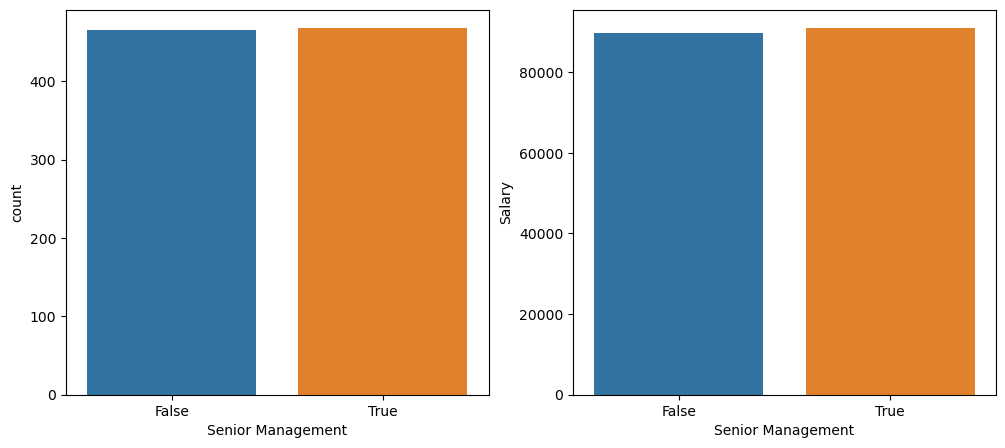

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x='Senior Management', data=df, ax=axes[0])
sns.barplot(x='Senior Management', y='Salary', data=df.groupby('Senior Management')[['Salary']].mean().reset_index(), ax=axes[1])

<AxesSubplot:xlabel='Bonus %', ylabel='Density'>

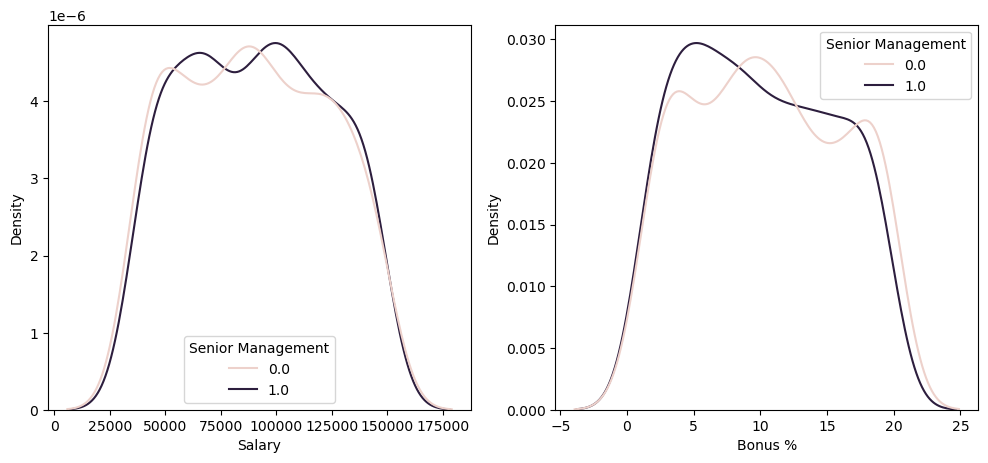

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.kdeplot(x='Salary', hue='Senior Management', data=df, ax=axes[0])
sns.kdeplot(x='Bonus %', hue='Senior Management', data=df, ax=axes[1])

In [46]:
df.groupby(['Team', 'Senior Management'])['Salary'].mean()

Team  Senior Management
1.0   False                87148.119048
      True                 93605.346939
2.0   False                92101.156863
      True                 93434.456522
3.0   False                87138.913793
      True                 90248.809524
4.0   False                89891.466667
      True                 89713.780488
5.0   False                85303.200000
      True                 89229.785714
6.0   False                90639.540541
      True                 97558.673469
7.0   False                95538.155556
      True                 87939.870370
8.0   False                94774.525000
      True                 85286.288889
9.0   False                91654.263158
      True                 93611.083333
10.0  False                85315.205128
      True                 88081.078947
Name: Salary, dtype: float64

<AxesSubplot:xlabel='Team', ylabel='Salary'>

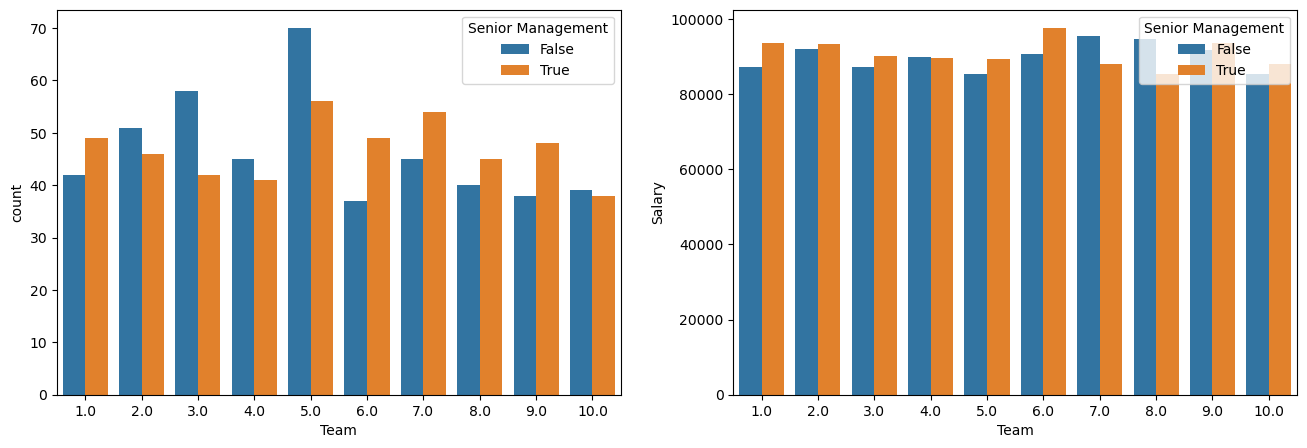

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

sns.countplot(x='Team', hue='Senior Management', data=df, ax=axes[0])
sns.barplot(x='Team', y='Salary', hue='Senior Management', data=df.groupby(['Team', 'Senior Management']).mean().reset_index(), ax=axes[1])

In [48]:
team_dict

{'Marketing': 1,
 'Finance': 2,
 'Client Services': 3,
 'Legal': 4,
 'Product': 5,
 'Engineering': 6,
 'Business Development': 7,
 'Human Resources': 8,
 'Sales': 9,
 'Distribution': 10}

In [49]:
df[df['Senior Management'].isna()]

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
7,NaN,0.0,7/20/2015,10:43 AM,45906,11.598,NaN,2.0
23,NaN,1.0,6/14/2012,4:19 PM,125792,5.042,NaN,5.0
25,NaN,1.0,10/8/2012,1:12 AM,37076,18.576,NaN,3.0
32,NaN,1.0,8/21/1998,2:27 PM,122340,6.417,NaN,5.0
39,NaN,1.0,1/29/2016,2:33 AM,122173,7.797,NaN,3.0
...,...,...,...,...,...,...,...,...
902,NaN,1.0,5/23/2001,7:52 PM,103877,6.322,NaN,10.0
925,NaN,0.0,8/23/2000,4:19 PM,95866,19.388,NaN,9.0
946,NaN,0.0,9/15/1985,1:50 AM,133472,16.941,NaN,10.0
947,NaN,1.0,7/30/2012,3:07 PM,107351,5.329,NaN,1.0


In [50]:
df[df['Senior Management'].isna()].groupby(['Team']).count()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management
Team,,,,,,,
1.0,0,7,7,7,7,7,0
2.0,0,5,5,5,5,5,0
3.0,0,6,6,6,6,6,0
4.0,0,2,2,2,2,2,0
5.0,0,12,12,12,12,12,0
6.0,0,6,6,6,6,6,0
7.0,0,2,2,2,2,2,0
8.0,0,6,6,6,6,6,0
9.0,0,8,8,8,8,8,0


In [51]:
df['Senior Management'] = df['Senior Management'].fillna(False)

In [52]:
df['Senior Management'].unique()

array([ True, False])

In [53]:
df['First Name'] = df['First Name'].fillna('unknown')

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   First Name         1000 non-null   object 
 1   Gender             1000 non-null   float64
 2   Start Date         1000 non-null   object 
 3   Last Login Time    1000 non-null   object 
 4   Salary             1000 non-null   int64  
 5   Bonus %            1000 non-null   float64
 6   Senior Management  1000 non-null   bool   
 7   Team               1000 non-null   float64
dtypes: bool(1), float64(3), int64(1), object(3)
memory usage: 55.8+ KB


In [55]:
df.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,1.0,8/6/1993,12:42 PM,97308,6.945,True,1.0
1,Thomas,1.0,3/31/1996,6:53 AM,61933,4.170,True,5.0
2,Maria,0.0,4/23/1993,11:17 AM,130590,11.858,False,2.0
3,Jerry,1.0,3/4/2005,1:00 PM,138705,9.340,True,2.0
4,Larry,1.0,1/24/1998,4:47 PM,101004,1.389,True,3.0


In [56]:
# MM/DD/YYYY

df['Start Year'] = df['Start Date'].apply(lambda x:x.split('/')[2])
df['Start Month'] = df['Start Date'].apply(lambda x:x.split('/')[0])
df['Start Day'] = df['Start Date'].apply(lambda x:x.split('/')[1])

df.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team,Start Year,Start Month,Start Day
0,Douglas,1.0,8/6/1993,12:42 PM,97308,6.945,True,1.0,1993,8,6
1,Thomas,1.0,3/31/1996,6:53 AM,61933,4.170,True,5.0,1996,3,31
2,Maria,0.0,4/23/1993,11:17 AM,130590,11.858,False,2.0,1993,4,23
3,Jerry,1.0,3/4/2005,1:00 PM,138705,9.340,True,2.0,2005,3,4
4,Larry,1.0,1/24/1998,4:47 PM,101004,1.389,True,3.0,1998,1,24


In [57]:
df['Start Year'] = df['Start Year'].astype('int')
df['Start Month'] = df['Start Month'].astype('int')
df['Start Day'] = df['Start Day'].astype('int')

In [58]:
df = df.sort_values(['Start Year', 'Start Month', 'Start Day'], ascending=True)
df

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team,Start Year,Start Month,Start Day
954,Joe,1.0,1/19/1980,4:06 PM,119667,1.148,True,2.0,1980,1,19
49,Chris,0.0,1/24/1980,12:13 PM,113590,3.055,False,9.0,1980,1,24
881,Ruby,0.0,1/28/1980,11:08 PM,142868,6.318,False,1.0,1980,1,28
272,Fred,1.0,2/20/1980,2:25 AM,74129,18.225,False,5.0,1980,2,20
549,Sara,0.0,2/25/1980,10:50 PM,75484,3.186,False,2.0,1980,2,25
...,...,...,...,...,...,...,...,...,...,...,...
239,Lillian,0.0,5/12/2016,3:43 PM,64164,17.612,False,8.0,2016,5,12
444,unknown,1.0,5/24/2016,9:17 PM,76409,7.008,False,10.0,2016,5,24
15,Lillian,0.0,6/5/2016,6:09 AM,59414,1.256,False,5.0,2016,6,5
98,Tina,0.0,6/16/2016,7:47 PM,100705,16.961,True,1.0,2016,6,16


<AxesSubplot:xlabel='Start Year', ylabel='Salary'>

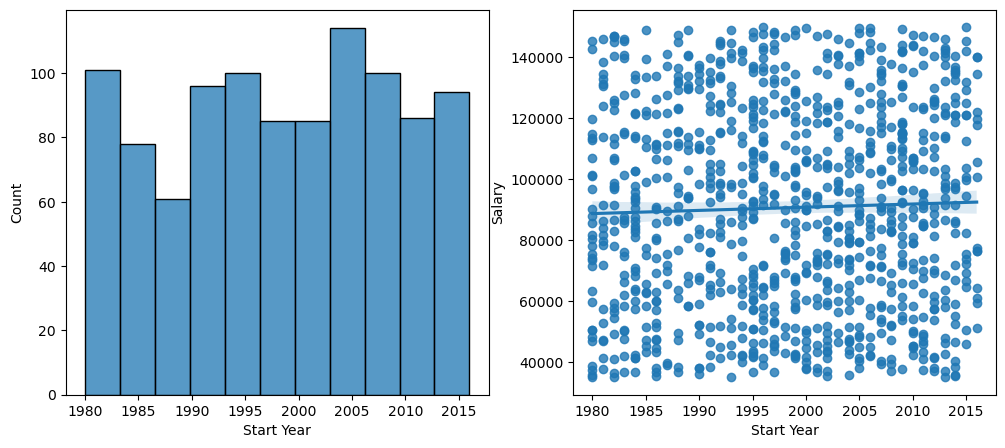

In [59]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df['Start Year'], ax=axes[0])
sns.regplot(x='Start Year', y='Salary', data=df, ax=axes[1])

In [60]:
from datetime import datetime
df['Date'] = pd.to_datetime(df['Start Date'], format='%m/%d/%Y')
df.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team,Start Year,Start Month,Start Day,Date
954,Joe,1.0,1/19/1980,4:06 PM,119667,1.148,True,2.0,1980,1,19,1980-01-19
49,Chris,0.0,1/24/1980,12:13 PM,113590,3.055,False,9.0,1980,1,24,1980-01-24
881,Ruby,0.0,1/28/1980,11:08 PM,142868,6.318,False,1.0,1980,1,28,1980-01-28
272,Fred,1.0,2/20/1980,2:25 AM,74129,18.225,False,5.0,1980,2,20,1980-02-20
549,Sara,0.0,2/25/1980,10:50 PM,75484,3.186,False,2.0,1980,2,25,1980-02-25


In [61]:
df['WorkingDays'] = (datetime.today() - df['Date']).dt.days

In [62]:
df.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team,Start Year,Start Month,Start Day,Date,WorkingDays
954,Joe,1.0,1/19/1980,4:06 PM,119667,1.148,True,2.0,1980,1,19,1980-01-19,16245
49,Chris,0.0,1/24/1980,12:13 PM,113590,3.055,False,9.0,1980,1,24,1980-01-24,16240
881,Ruby,0.0,1/28/1980,11:08 PM,142868,6.318,False,1.0,1980,1,28,1980-01-28,16236
272,Fred,1.0,2/20/1980,2:25 AM,74129,18.225,False,5.0,1980,2,20,1980-02-20,16213
549,Sara,0.0,2/25/1980,10:50 PM,75484,3.186,False,2.0,1980,2,25,1980-02-25,16208


In [63]:
df.tail()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team,Start Year,Start Month,Start Day,Date,WorkingDays
239,Lillian,0.0,5/12/2016,3:43 PM,64164,17.612,False,8.0,2016,5,12,2016-05-12,2982
444,unknown,1.0,5/24/2016,9:17 PM,76409,7.008,False,10.0,2016,5,24,2016-05-24,2970
15,Lillian,0.0,6/5/2016,6:09 AM,59414,1.256,False,5.0,2016,6,5,2016-06-05,2958
98,Tina,0.0,6/16/2016,7:47 PM,100705,16.961,True,1.0,2016,6,16,2016-06-16,2947
451,Terry,1.0,7/15/2016,12:29 AM,140002,19.490,True,1.0,2016,7,15,2016-07-15,2918


<AxesSubplot:xlabel='WorkingDays', ylabel='Salary'>

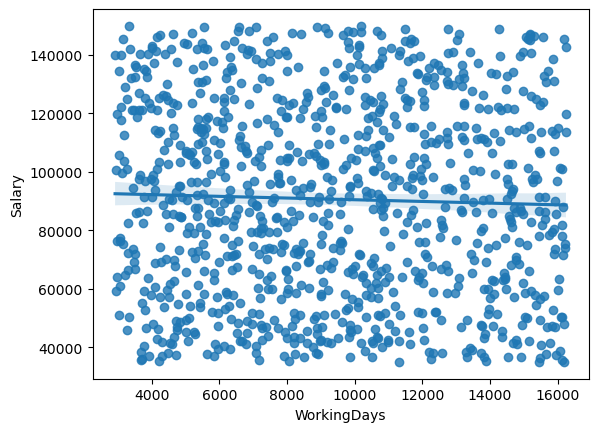

In [64]:
sns.regplot(x='WorkingDays', y='Salary', data=df)

In [65]:
df['Senior Management'] = df['Senior Management'].astype('category').cat.codes

In [66]:
df.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team,Start Year,Start Month,Start Day,Date,WorkingDays
954,Joe,1.0,1/19/1980,4:06 PM,119667,1.148,1,2.0,1980,1,19,1980-01-19,16245
49,Chris,0.0,1/24/1980,12:13 PM,113590,3.055,0,9.0,1980,1,24,1980-01-24,16240
881,Ruby,0.0,1/28/1980,11:08 PM,142868,6.318,0,1.0,1980,1,28,1980-01-28,16236
272,Fred,1.0,2/20/1980,2:25 AM,74129,18.225,0,5.0,1980,2,20,1980-02-20,16213
549,Sara,0.0,2/25/1980,10:50 PM,75484,3.186,0,2.0,1980,2,25,1980-02-25,16208


In [67]:
drop_col = ['First Name', 'Start Date', 'Last Login Time', 'Date', 'Salary']


In [68]:
from sklearn.model_selection import train_test_split, cross_validate, KFold, GridSearchCV

X = df.drop(columns=drop_col)
Y = df['Salary']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [69]:
X_train.head()

,Gender,Bonus %,Senior Management,Team,Start Year,Start Month,Start Day,WorkingDays
821,0.0,12.254,0,10.0,1980,12,27,15902
789,0.0,6.293,0,5.0,2000,7,8,8769
205,1.0,8.012,1,2.0,2006,3,27,6681
380,1.0,5.660,0,9.0,2001,7,15,8397
383,1.0,2.362,0,5.0,2010,7,28,5097


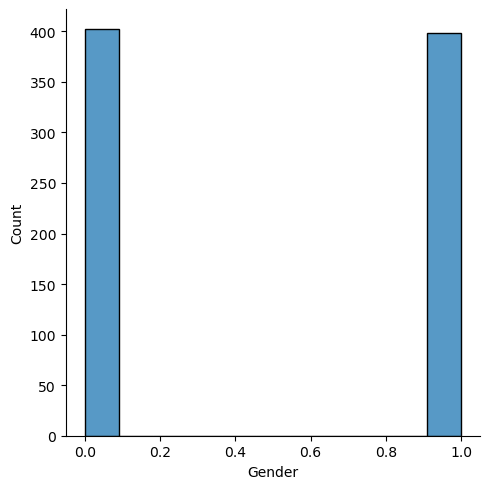

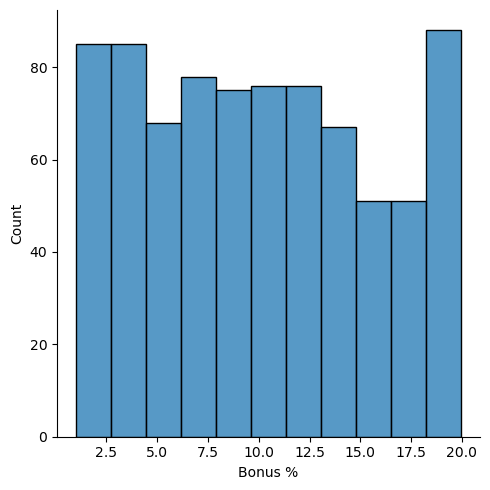

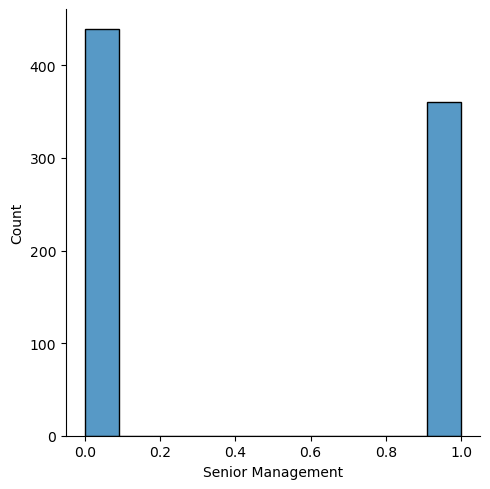

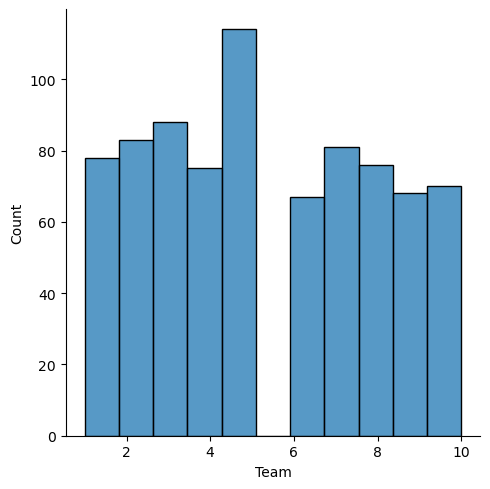

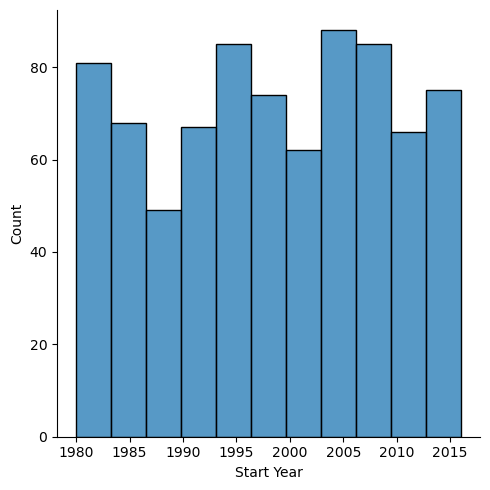

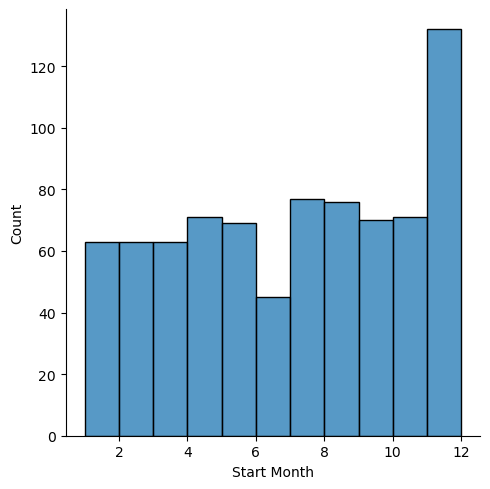

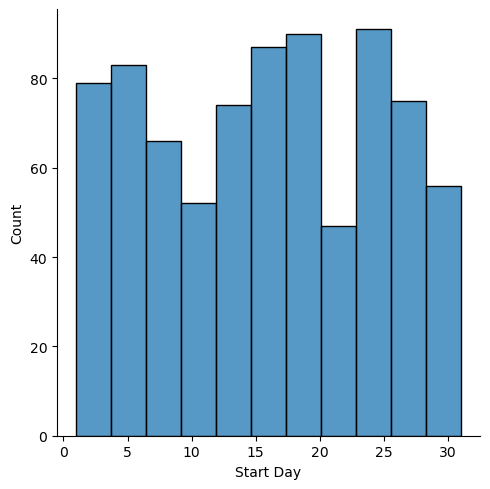

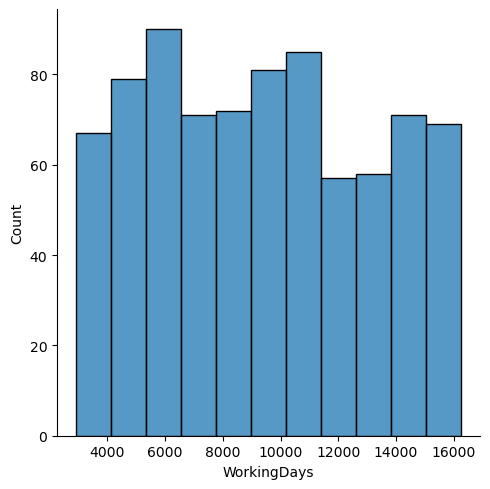

In [70]:
for col in X_train.columns:
    sns.displot(X_train[col])

In [71]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [72]:
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.metrics import mean_squared_error

lasso = Lasso()
score = cross_validate(lasso, X_train_scale, Y_train, cv=KFold(), return_train_score=True, n_jobs=-1)
print(np.mean(score['train_score']), np.mean(score['test_score']))

ridge = Ridge()
score = cross_validate(ridge, X_train_scale, Y_train, cv=KFold(), return_train_score=True, n_jobs=-1)
print(np.mean(score['train_score']), np.mean(score['test_score']))

lr = LinearRegression()
score = cross_validate(lr, X_train_scale, Y_train, cv=KFold(), return_train_score=True, n_jobs=-1)
print(np.mean(score['train_score']), np.mean(score['test_score']))

0.00884156526429356 -0.015191480279612878
0.008841234618112148 -0.015174416550463699
0.010375238278616328 -0.01605817387015267


In [73]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

rf = RandomForestRegressor()
gb = GradientBoostingRegressor()

score = cross_validate(rf, X_train_scale, Y_train, cv=KFold(), return_train_score=True, n_jobs=-1)
print(np.mean(score['train_score']), np.mean(score['test_score']))


score = cross_validate(gb, X_train_scale, Y_train, cv=KFold(), return_train_score=True, n_jobs=-1)
print(np.mean(score['train_score']), np.mean(score['test_score']))

0.8441465434543971 -0.108513381051963
0.3884411173789085 -0.09978202083372238


In [75]:
Y_train_scale = np.log1p(Y_train)
Y_test_scale = np.log1p(Y_test)

In [78]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt_params = {
    'criterion': ['squared_error'],
    'max_depth':[None, 2, 3, 4, 5, 6]   
}

grid_dt = GridSearchCV(dt, dt_params, cv=5)
grid_dt.fit(X_train, Y_train_scale)
pred = grid_dt.predict(X_train)
mse = mean_squared_error(Y_train_scale, pred)
mse

0.15209768391660433

In [80]:
rf = RandomForestRegressor()
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': range(2, 20, 2)
}

grid_rf = GridSearchCV(rf, rf_params, cv=5)
grid_rf.fit(X_train, Y_train_scale)
pred = grid_rf.predict(X_train)
mse = mean_squared_error(Y_train_scale, pred)
mse

0.15223857973369637

In [81]:
gb = GradientBoostingRegressor()
gb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': range(2, 20, 2)
}

grid_gb = GridSearchCV(gb, gb_params, cv=5)
grid_gb.fit(X_train, Y_train_scale)
pred = grid_gb.predict(X_train)
mse = mean_squared_error(Y_train_scale, pred)
mse

0.13115906078843562

In [82]:
grid_gb.best_params_

{'max_depth': 2, 'n_estimators': 100}

In [83]:
gb_test = GradientBoostingRegressor(max_depth=2, n_estimators=100)
gb_test.fit(X_train, Y_train_scale)
pred_test = gb_test.predict(X_test)
mse = mean_squared_error(Y_test_scale, pred_test)
mse

0.17278180945082838